In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from torch import nn
from torch.nn import functional as F
import pandas as pd

In [2]:
def ToNumpy(x):
    return x.cpu().detach().numpy()

In [3]:
x_np = np.random.normal(0,1,size=(10000,2))

data = torch.FloatTensor(x_np)

In [4]:
x_np

array([[-1.7770606 , -0.05369774],
       [-0.6167205 , -0.49767287],
       [-0.35374795,  0.16897271],
       ...,
       [-0.50975545, -1.60803381],
       [-0.80844318,  0.41642761],
       [-0.08492153, -1.59029785]])

In [5]:
linear = nn.Linear(2,1)
print(linear)
print('weight :', linear.weight.data)
print('bias :', linear.bias.data)

Linear(in_features=2, out_features=1, bias=True)
weight : tensor([[ 0.5039, -0.1517]])
bias : tensor([0.2565])


In [6]:
y = linear(data)

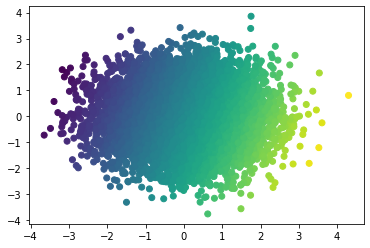

In [7]:
plt.scatter(x_np[:,0],x_np[:,1],c=ToNumpy(y))

In [235]:
features = 500
x_np = np.random.normal(0,1,size=(10000,features))
y_np = np.random.normal(0,1,size=(10000,1))+1
data = torch.FloatTensor(x_np)
y_target = torch.FloatTensor(y_np)

In [236]:
squential_network = []
layers_num=2

for i in range(layers_num):
    squential_network.append(nn.Linear(features,features))
    squential_network.append(nn.ReLU())
squential_network.append(nn.Linear(features,1))

In [237]:
model = nn.Sequential(*squential_network)
model

Sequential(
  (0): Linear(in_features=500, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=500, bias=True)
  (3): ReLU()
  (4): Linear(in_features=500, out_features=1, bias=True)
)

In [238]:
y_pred = model(data)
y_pred

tensor([[0.0397],
        [0.2171],
        [0.0843],
        ...,
        [0.2078],
        [0.1669],
        [0.1080]], grad_fn=<AddmmBackward>)

In [239]:
loss_func = nn.MSELoss()

In [ ]:
def MSE(y_pred, y_target):
    return ((y_target - y_pred) ** 2).mean()

In [240]:
loss = loss_func(y_pred,y_target)

In [241]:
loss

tensor(1.8708, grad_fn=<MseLossBackward>)

In [242]:
class Layer(nn.Linear):
    def __init__(self, in_features, out_features, activation_function, bias = True):
        super().__init__(in_features, out_features, bias)
        self.activation_function = activation_function
        
    def forward(self,x):
        x = super().forward(x)
        x = self.activation_function(x)
        return x

In [243]:
def CreateModel(layers_num,features_num,activation_function):
    squential_network = []
    for i in range(layers_num):
        squential_network.append(Layer(features_num ,features_num, activation_function))
    squential_network.append(nn.Linear(features_num,1))
    return nn.Sequential(*squential_network)

In [244]:
def PlotGradients(model, layers_num):
    plt.rcParams['figure.figsize'] = [18, 4]
    for i,layer in enumerate(model):
        mean = layer.weight.grad.mean()
        std = layer.weight.grad.std()
        ax = plt.subplot(1,layers_num+1,i+1)
        ax.hist(ToNumpy(layer.weight.grad)[0])
        ax.set_title('layer nr '+str(i))
        ax.set_xlabel("\nmean {0:0.5f},\nstd {1:0.5f}".format(mean,std))


In [245]:
layers_num =5

In [246]:
model = CreateModel(layers_num,features,nn.Sigmoid())
y_pred = model(data)
loss = loss_func(y_pred,y_target)
loss.backward()

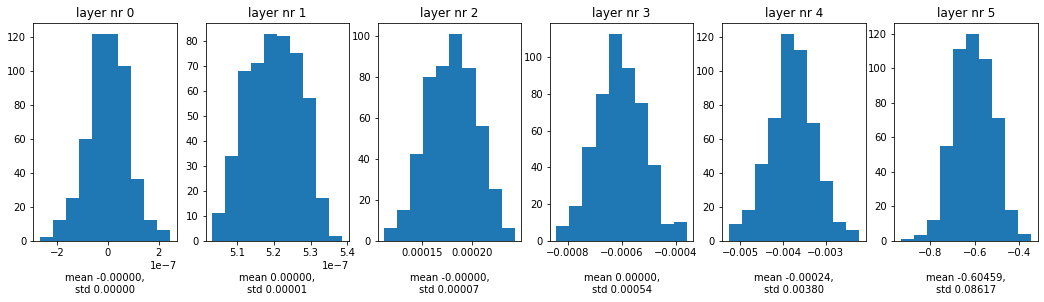

In [247]:
PlotGradients(model,layers_num)

In [248]:
def Experimant(activation_function):
    model = CreateModel(layers_num,features,activation_function)
    y_pred = model(data)
    loss = loss_func(y_pred,y_target)
    loss.backward()
    PlotGradients(model,layers_num)

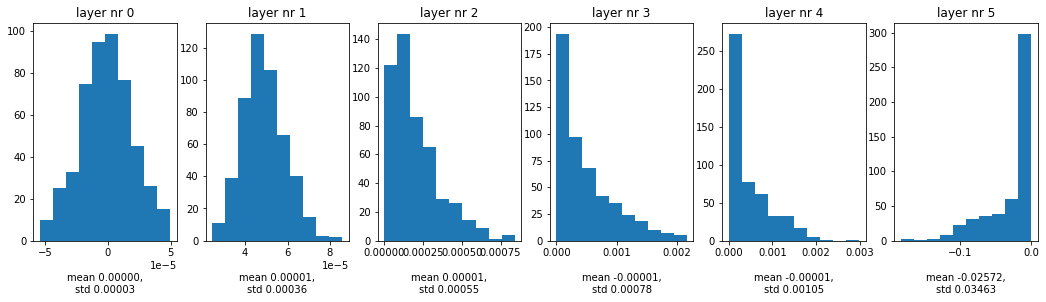

In [249]:
Experimant(nn.ReLU())

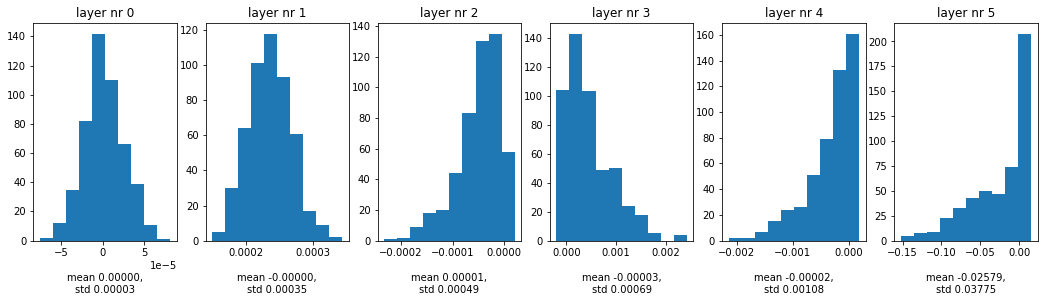

In [254]:
Experimant(nn.LeakyReLU(0.1))

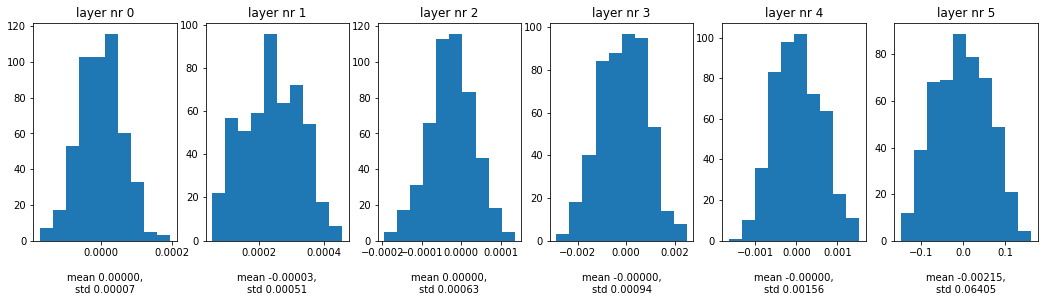

In [253]:
Experimant(nn.CELU())

In [251]:
def Mish(x):
    return x *( torch.tanh(F.softplus(x)))

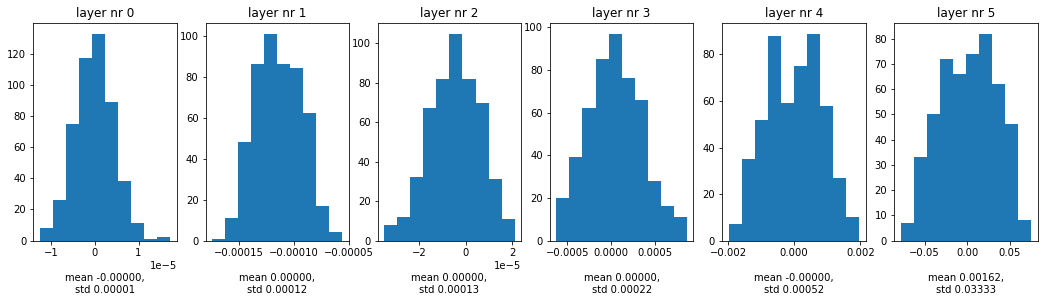

In [252]:
Experimant(Mish)

In [256]:
class Layer(nn.Linear):
    def __init__(self, in_features, out_features, activation_function, bias = True):
        super().__init__(in_features, out_features, bias)
        self.activation_function = activation_function
        
    def forward(self,x):
        x = super().forward(x)
        x = x+self.activation_function(x)
        return x

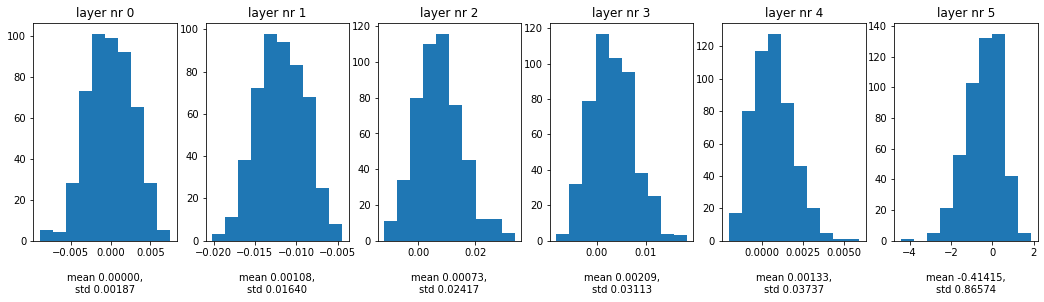

In [257]:
Experimant(nn.ReLU())